## 3. Data Visualization

In [55]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.feature_selection import mutual_info_regression
from xgboost import XGBClassifier

# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Styling
sns.reset_defaults()
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="mako")

print("All libraries imported successfully")

All libraries imported successfully


In [57]:
data = pd.read_csv('MergeData.csv')

In [43]:
# Basic info
print("Shape:", data.shape)
data.info()

# Preview
data.head()

Shape: (1048575, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           777715 non-null   float64
 1   ID                   777715 non-null   float64
 2   CODE_GENDER          777715 non-null   object 
 3   FLAG_OWN_CAR         777715 non-null   float64
 4   FLAG_OWN_REALTY      777715 non-null   float64
 5   CNT_CHILDREN         777715 non-null   float64
 6   AMT_INCOME_TOTAL     777715 non-null   float64
 7   NAME_INCOME_TYPE     777715 non-null   object 
 8   NAME_EDUCATION_TYPE  777715 non-null   object 
 9   NAME_FAMILY_STATUS   777715 non-null   object 
 10  NAME_HOUSING_TYPE    777715 non-null   object 
 11  DAYS_BIRTH           777715 non-null   float64
 12  DAYS_EMPLOYED        777715 non-null   float64
 13  FLAG_MOBIL           777715 non-null   float64
 14  FLAG_WORK_PHONE      777715 n

,Unnamed: 0,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CHILDREN_RATIO,MONTHS_BALANCE,STATUS,Label
0,0.0,5008804.0,M,1.0,1.0,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Unknown,2.0,32.0,12.0,0.0,0.0,C,Good
1,1.0,5008804.0,M,1.0,1.0,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Unknown,2.0,32.0,12.0,0.0,-1.0,C,Good
2,2.0,5008804.0,M,1.0,1.0,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Unknown,2.0,32.0,12.0,0.0,-2.0,C,Good
3,3.0,5008804.0,M,1.0,1.0,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Unknown,2.0,32.0,12.0,0.0,-3.0,C,Good
4,4.0,5008804.0,M,1.0,1.0,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,Unknown,2.0,32.0,12.0,0.0,-4.0,C,Good


### DEMOGRAPHIC ANALYSIS

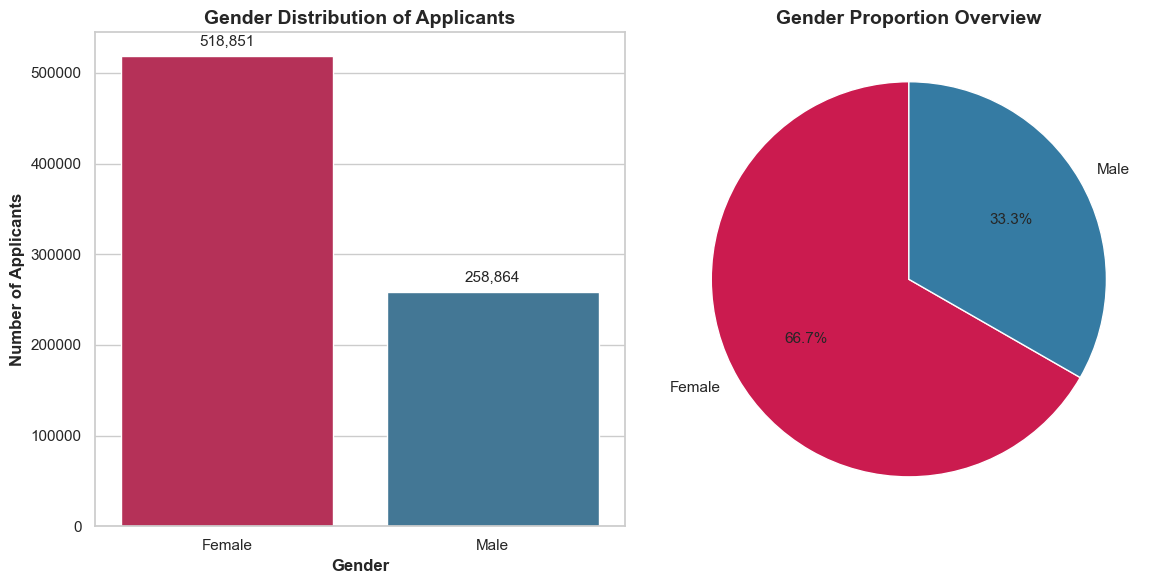

In [44]:
# Gender Distribution 
plt.figure(figsize=(12, 6))

data['CODE_GENDER'] = data['CODE_GENDER'].replace({'M': 'Male', 'F': 'Female'})

custom_palette = {
    'Male': sns.color_palette('mako', 3)[1],
    'Female': sns.color_palette('rocket', 3)[1]
}

# Bar chart
plt.subplot(1, 2, 1)
ax = sns.countplot(data=data, x='CODE_GENDER', palette=custom_palette, order= data['CODE_GENDER'].value_counts().index)

for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.01 * len(data),
            f'{count:,}',  # formatted with commas for readability
            ha='center', fontsize=11)


plt.title('Gender Distribution of Applicants', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12, weight='bold')
plt.ylabel('Number of Applicants', fontsize=12, weight='bold')

# Pie Chart
gender_counts = data['CODE_GENDER'].value_counts()
plt.subplot(1, 2, 2)
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=[custom_palette[g] for g in gender_counts.index],
    startangle=90,
    textprops={'fontsize': 11}
)
plt.title('Gender Proportion Overview', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


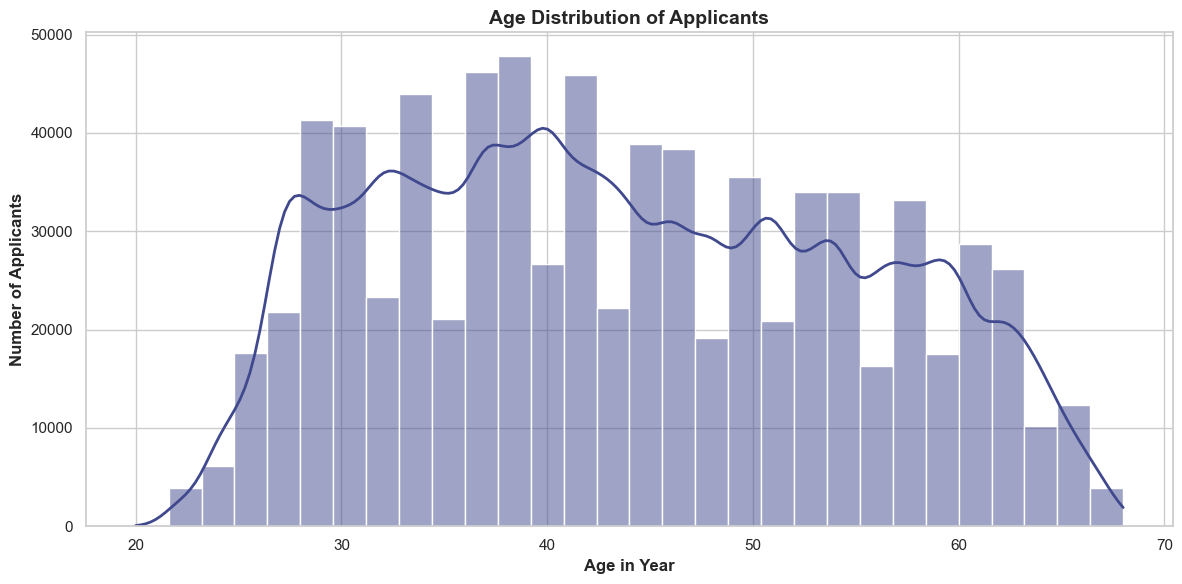

In [45]:
# Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['AGE'], bins=30, kde=True, color=sns.color_palette('mako', 2)[0], line_kws={'color': sns.color_palette('mako', 3)[2], 'linewidth': 2})
plt.title('Age Distribution of Applicants', fontsize=14, weight='bold')
plt.xlabel('Age in Year', fontsize=12, weight='bold')
plt.ylabel('Number of Applicants', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Demographic Analysis – Key Findings
1. The applicant population is mostly female (≈66.7%), with males accounting for about 33.3%, indicating a noticeable gender imbalance.
2. Applicants are mainly within the working-age range, with the highest concentration between 30 and 45 years old.
3. Very young (<25) and older (>60) applicants represent a smaller proportion of the dataset.
4. These demographic patterns suggest the data is skewed toward working-age female applicants, which should be considered in further analysis and modeling.

### Ownership Analysis

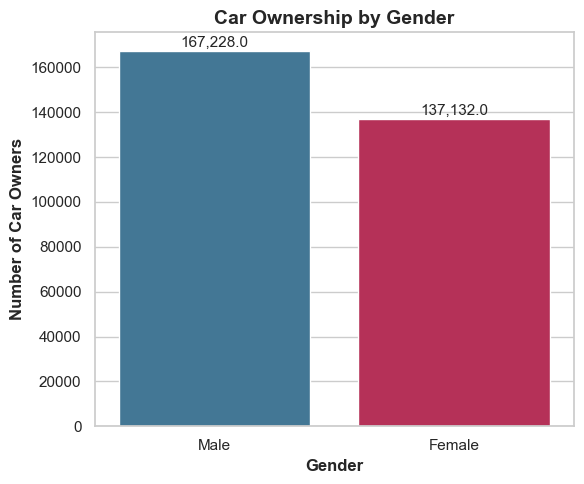

In [46]:
# Car Ownership by Gender

car_by_gender = data.groupby('CODE_GENDER')['FLAG_OWN_CAR'].sum().sort_values(ascending=False)
custom_palette = {
    'Male': sns.color_palette('mako', 3)[1],
    'Female': sns.color_palette('rocket', 3)[1]
}

plt.figure(figsize=(6, 5))
ax = sns.barplot(x=car_by_gender.index, y=car_by_gender.values, palette=custom_palette)


for i, v in enumerate(car_by_gender.values):
    ax.text(i, v + (max(car_by_gender.values) * 0.01), f'{v:,}', ha='center', fontsize=11)

plt.title('Car Ownership by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12, weight='bold')
plt.ylabel('Number of Car Owners', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

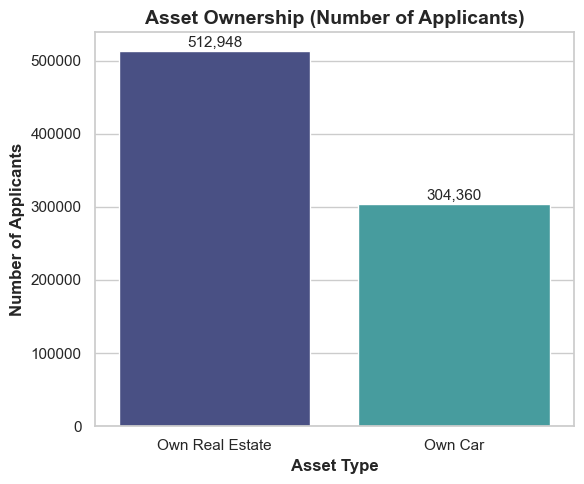

In [47]:
# Overall
ownership_counts = data[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].apply(lambda x: (x == 1).sum())
ownership_counts = ownership_counts.sort_values(ascending=False)


ownership_counts = ownership_counts.rename({
    'FLAG_OWN_REALTY': 'Own Real Estate',
    'FLAG_OWN_CAR': 'Own Car'
})

plt.figure(figsize=(6, 5))
ax = sns.barplot(x=ownership_counts.index, y=ownership_counts.values, palette='mako')


for i, v in enumerate(ownership_counts.values):
    ax.text(i, v + (max(ownership_counts.values) * 0.01), f'{v:,}', ha='center', fontsize=11)

plt.title('Asset Ownership (Number of Applicants)', fontsize=14, weight='bold')
plt.xlabel('Asset Type', fontsize=12, weight='bold')
plt.ylabel('Number of Applicants', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

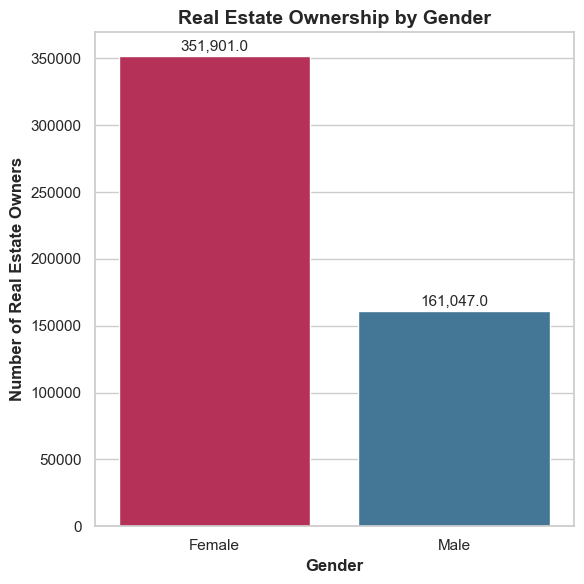

In [48]:
# Real Estate Ownership by Gender
realty_by_gender = data.groupby('CODE_GENDER')['FLAG_OWN_REALTY'].sum().sort_values(ascending=False)
custom_palette = {
    'Male': sns.color_palette('mako', 3)[1],
    'Female': sns.color_palette('rocket', 3)[1]
}

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=realty_by_gender.index, y=realty_by_gender.values, palette=custom_palette)

for i, v in enumerate(realty_by_gender.values):
    ax.text(i, v + (max(realty_by_gender.values) * 0.01), f'{v:,}', ha='center', fontsize=11)

plt.title('Real Estate Ownership by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12, weight='bold')
plt.ylabel('Number of Real Estate Owners', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

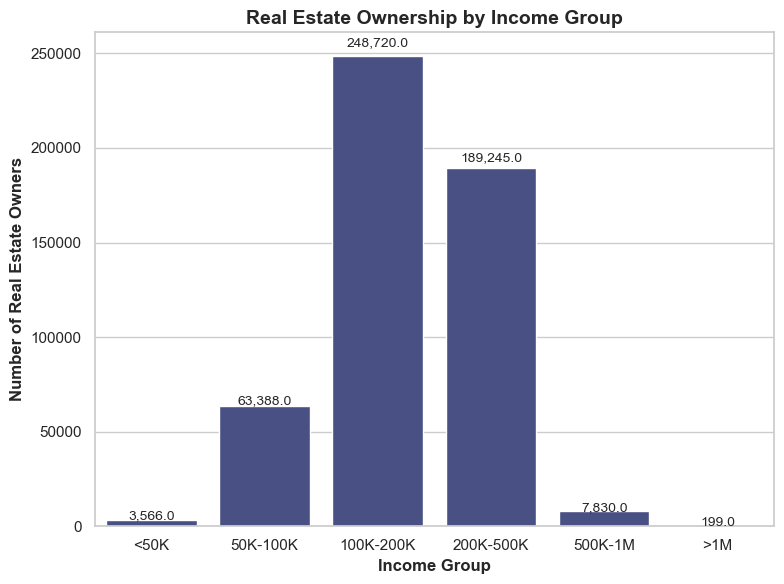

In [49]:
# Real Estate Ownership by Income
bins = [0, 50000, 100000, 200000, 500000, 1000000, data['AMT_INCOME_TOTAL'].max()]
labels = ['<50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', '>1M']
data['INCOME_GROUP'] = pd.cut(data['AMT_INCOME_TOTAL'], bins=bins, labels=labels)


income_realty = data.groupby('INCOME_GROUP')['FLAG_OWN_REALTY'].sum()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=income_realty.index, y=income_realty.values,
                 color=sns.color_palette('mako', 2)[0])

for i, v in enumerate(income_realty.values):
    ax.text(i, v * 1.02, f'{v:,}', ha='center', fontsize=10)

plt.title('Real Estate Ownership by Income Group', fontsize=14, weight='bold')
plt.xlabel('Income Group', fontsize=12, weight='bold')
plt.ylabel('Number of Real Estate Owners', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

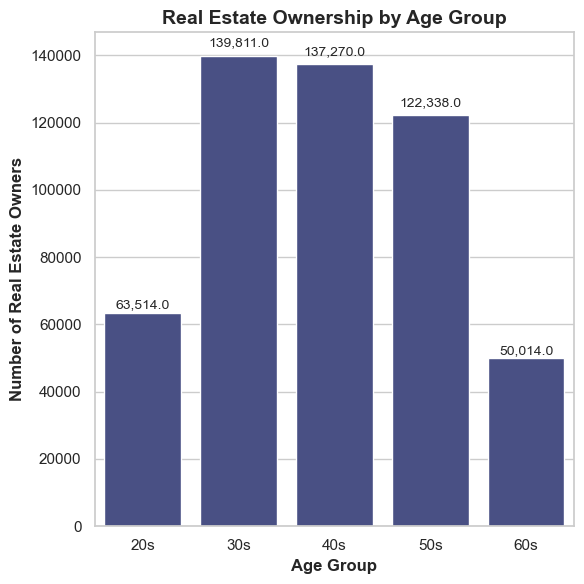

In [50]:
# Real Estate Ownership by Age Group

bins = [20, 30, 40, 50, 60, 70]
labels = ['20s', '30s', '40s', '50s', '60s']
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels)

age_realty = data.groupby('AGE_GROUP')['FLAG_OWN_REALTY'].sum()  # no sorting

plt.figure(figsize=(6, 6))
ax = sns.barplot(x=age_realty.index, y=age_realty.values,
                 color=sns.color_palette('mako', 2)[0])

for i, v in enumerate(age_realty.values):
    ax.text(i, v * 1.02, f'{v:,}', ha='center', fontsize=10)

plt.title('Real Estate Ownership by Age Group', fontsize=14, weight='bold')
plt.xlabel('Age Group', fontsize=12, weight='bold')
plt.ylabel('Number of Real Estate Owners', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Ownership Analysis – Key Findings
1. Among applicants, real estate ownership is significantly more common than car ownership, highlighting property as the dominant asset type in the dataset.
2. Male applicants are more likely to own cars, while female applicants dominate real estate ownership, reflecting differing asset ownership patterns by gender.
3. Real estate ownership is highest among middle-income groups, particularly those earning 100K–200K and 200K–500K, suggesting a strong relationship between income level and property ownership.
4. Applicants in their 30s and 40s represent the largest share of real estate owners, indicating that property ownership peaks during prime earning years.
5. Ownership levels decline among younger (20s) and older (60s) age groups, likely due to limited financial capacity or retirement status.

### Family / Dependents Analysis

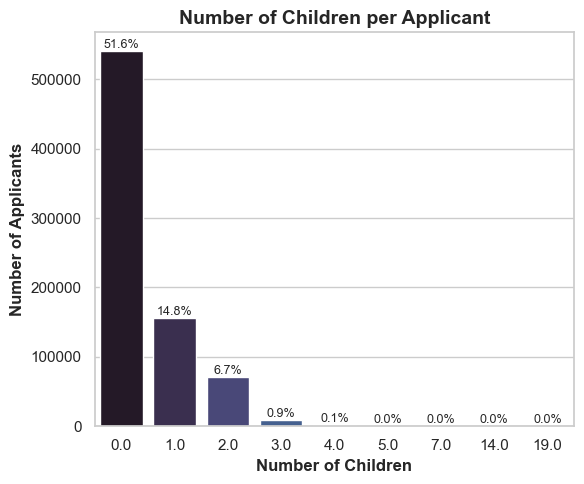

In [51]:
# Number of children per applicant
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=data, x='CNT_CHILDREN', palette='mako')

# Add percentages on top of bars
total = len(data)
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f'{percentage:.1f}%',
        ha='center', va='bottom', fontsize=9
    )

plt.title('Number of Children per Applicant', fontsize=14, weight='bold')
plt.xlabel('Number of Children', fontsize=12, weight='bold')
plt.ylabel('Number of Applicants', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Family / Dependents Analysis – Key Findings
1. Over half of applicants have no dependents.
2. Most families have one or two children.
3. Large families are extremely uncommon in the dataset.

### EMPLOYMENT ANALYSIS

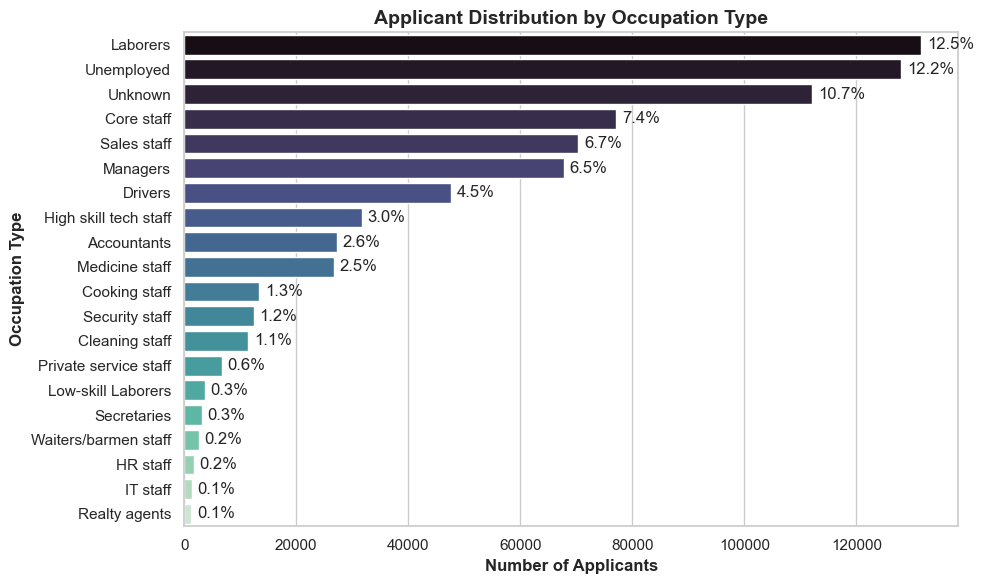

In [52]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y='OCCUPATION_TYPE',
                   order=data['OCCUPATION_TYPE'].value_counts().index,
                   palette='mako')

total = len(data)
for p in ax.patches:
    count = int(p.get_width())
    percentage = 100 * count / total
    ax.text(p.get_width() + 1000, p.get_y() + p.get_height()/2,
            f'{percentage:.1f}%', va='center')

plt.title('Applicant Distribution by Occupation Type', fontsize=14, weight='bold')
plt.xlabel('Number of Applicants', fontsize=12, weight='bold')
plt.ylabel('Occupation Type', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Employment Analysis – Key Findings
1. Laborers and unemployed applicants form the largest employment groups, indicating a substantial proportion of applicants with potentially unstable or variable income.
2. A significant portion of occupation data is unknown, which may introduce uncertainty and should be handled carefully in further analysis or modeling.
3. Professional and highly skilled roles(e.g., IT, medicine, accountants) are underrepresented.
4. Overall, the employment distribution is skewed toward manual labor and non-professional roles, which may influence creditworthiness and risk assessments.

### FINANCIAL ANALYSIS

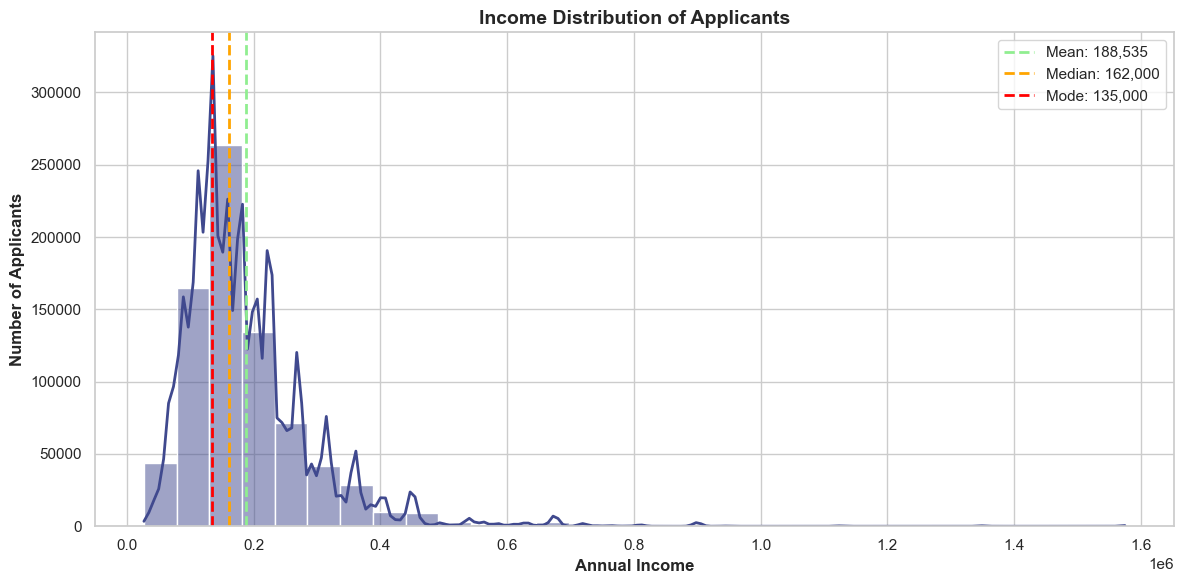

In [53]:
# Income Distribution
plt.figure(figsize=(12, 6))  

# Histogram with KDE
sns.histplot(data['AMT_INCOME_TOTAL'], bins=30, kde=True, color=sns.color_palette('mako', 2)[0], line_kws={'color': sns.color_palette('mako', 3)[2], 'linewidth': 2})

# Title & labels (same font size as other charts)
plt.title('Income Distribution of Applicants', fontsize=14, weight='bold')
plt.xlabel('Annual Income', fontsize=12, weight='bold')
plt.ylabel('Number of Applicants', fontsize=12, weight='bold')

# Calculate stats
mean_val = data['AMT_INCOME_TOTAL'].mean()
median_val = data['AMT_INCOME_TOTAL'].median()
mode_val = data['AMT_INCOME_TOTAL'].mode()[0]

# Add vertical lines for mean, median, mode
plt.axvline(mean_val, color='lightgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
plt.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
plt.axvline(mode_val, color='red', linestyle='--', linewidth=2, label=f'Mode: {mode_val:,.0f}')

# Legend and layout
plt.legend()
plt.tight_layout()
plt.show()

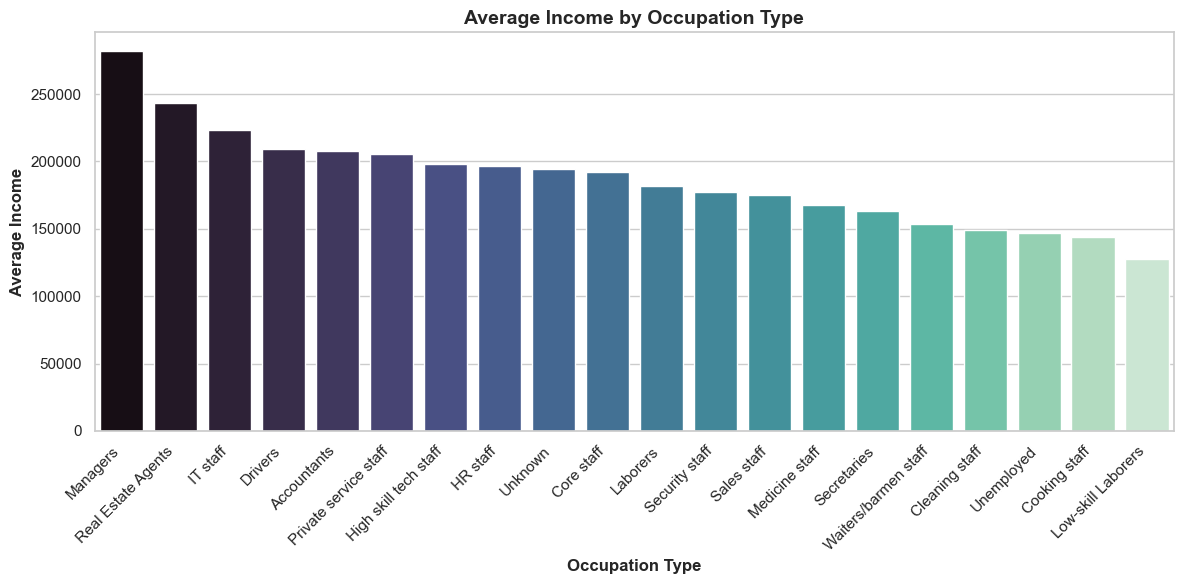

In [54]:
# Income and Occupation Type
plt.figure(figsize=(12, 6))
data['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE'].replace(
    {'Realty agents': 'Real Estate Agents'}
)
sns.barplot(
    data=data, 
    x='OCCUPATION_TYPE', 
    y='AMT_INCOME_TOTAL', 
    estimator='mean', 
    ci=None, 
    order=data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL']
                .mean()
                .sort_values(ascending=False)
                .index,
    palette='mako'
)
plt.title('Average Income by Occupation Type', fontsize=14, weight='bold')
plt.xlabel('Occupation Type', fontsize=12, weight='bold')
plt.ylabel('Average Income', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

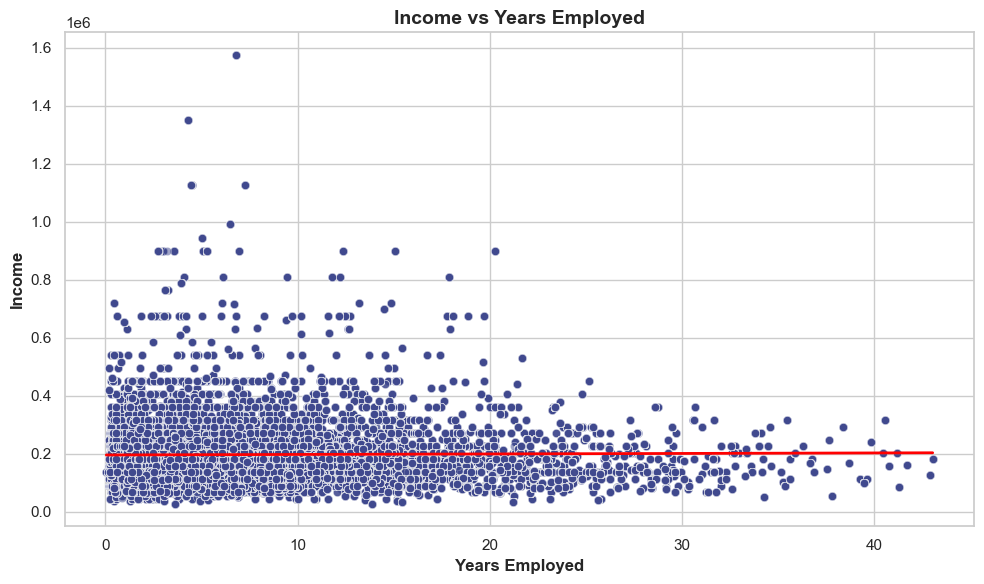

In [17]:
# Income and Years Employed

data_clean = data[data['DAYS_EMPLOYED'] < 0]
data_clean['YEARS_EMPLOYED'] = abs(data_clean['DAYS_EMPLOYED'] / 365)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_clean,
    x='YEARS_EMPLOYED',
    y='AMT_INCOME_TOTAL',
    alpha=0.5,
    color=sns.color_palette('mako', 2)[0]
)
sns.regplot(
    data=data_clean,
    x='YEARS_EMPLOYED',
    y='AMT_INCOME_TOTAL',
    scatter=False,
    color='red',
    line_kws={'lw': 2}
)
plt.title('Income vs Years Employed', fontsize=14, weight='bold')
plt.xlabel('Years Employed', fontsize=12, weight='bold')
plt.ylabel('Income', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

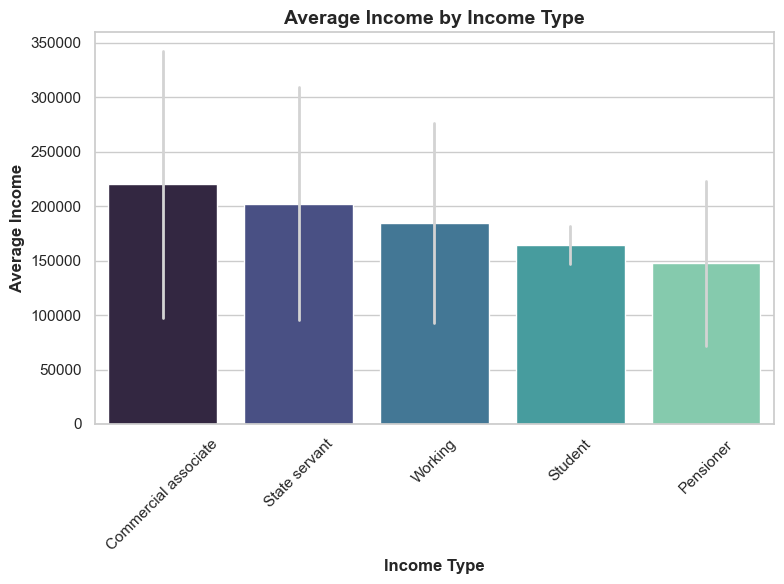

In [63]:
# Average Income by Income Type

plt.figure(figsize=(8, 6))
sns.barplot(
    data=data,
    x='NAME_INCOME_TYPE',
    y='AMT_INCOME_TOTAL',
    estimator='mean',
    ci='sd',
    order=data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL']
              .mean()
              .sort_values(ascending=False)
              .index,
    palette='mako',
    errcolor='lightgrey',
    errwidth=2
)
plt.title('Average Income by Income Type', fontsize=14, weight='bold')
plt.xlabel('Income Type', fontsize=12, weight='bold')
plt.ylabel('Average Income', fontsize=12, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

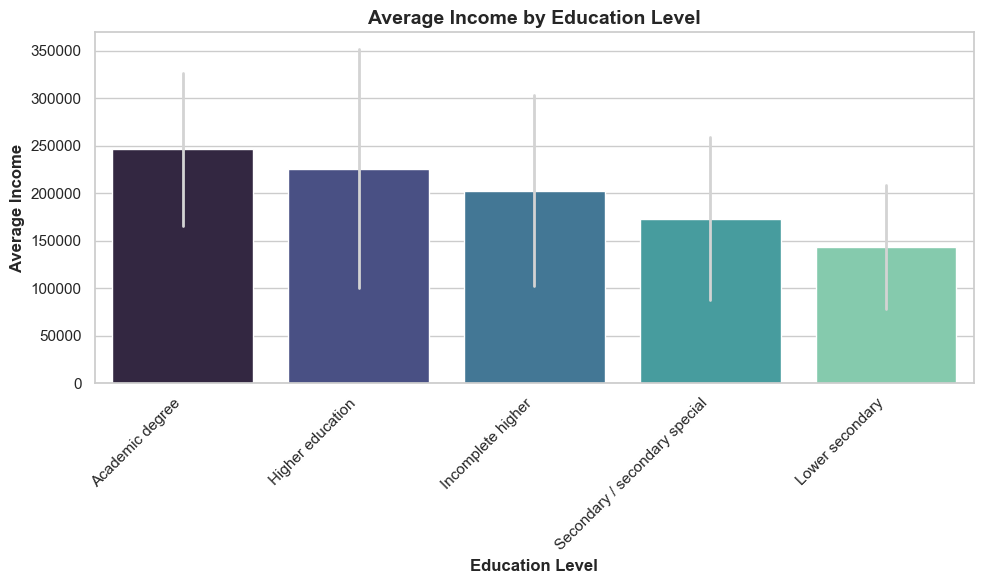

In [62]:
# Average Income by Education Level
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data,
    x='NAME_EDUCATION_TYPE',
    y='AMT_INCOME_TOTAL',
    estimator='mean',
    ci='sd',
    order=data.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL']
              .mean()
              .sort_values(ascending=False)
              .index,
    palette='mako',
    errcolor='lightgrey',
    errwidth=2
)

plt.title('Average Income by Education Level', fontsize=14, weight='bold')
plt.xlabel('Education Level', fontsize=12, weight='bold')
plt.ylabel('Average Income', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


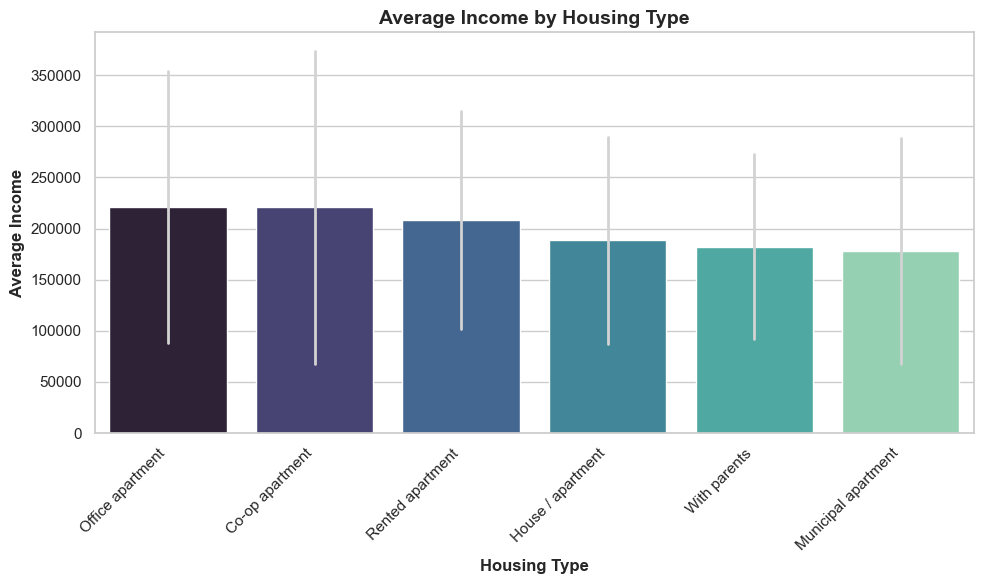

In [19]:
# Average Income by Housing Type
plt.figure(figsize=(10, 6))
sns.barplot(
    data=data,
    x='NAME_HOUSING_TYPE',
    y='AMT_INCOME_TOTAL',
    estimator='mean',
    ci='sd',
    order=data.groupby('NAME_HOUSING_TYPE')['AMT_INCOME_TOTAL']
              .mean()
              .sort_values(ascending=False)
              .index,
    palette='mako',
    errcolor='lightgrey',
    errwidth=2
)

plt.title('Average Income by Housing Type', fontsize=14, weight='bold')
plt.xlabel('Housing Type', fontsize=12, weight='bold')
plt.ylabel('Average Income', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


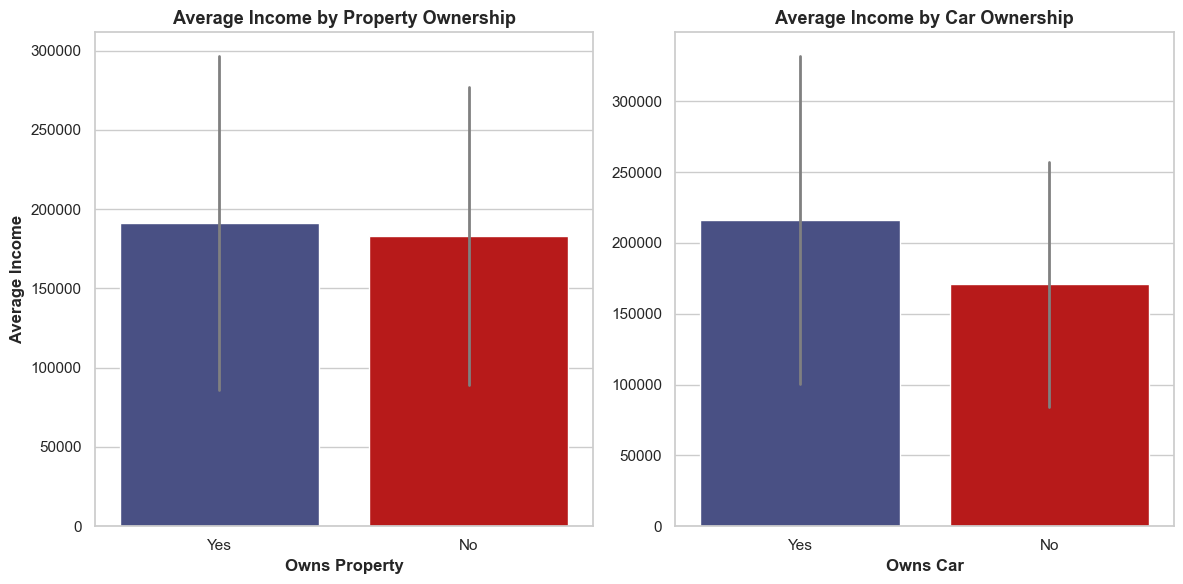

In [20]:
plt.figure(figsize=(12, 6))

# Income and Property Ownership
plt.subplot(1, 2, 1)
sns.barplot(
    data=data.replace({'FLAG_OWN_REALTY': {0: 'No', 1: 'Yes'}}),
    x='FLAG_OWN_REALTY',
    y='AMT_INCOME_TOTAL',
    estimator='mean',
    ci='sd',
    palette={'Yes': sns.color_palette('mako', 2)[0], 'No': '#D10000'},
    errcolor='grey',
    errwidth=2
)
plt.title('Average Income by Property Ownership', fontsize=13, weight='bold')
plt.xlabel('Owns Property', fontsize=12, weight='bold')
plt.ylabel('Average Income', fontsize=12, weight='bold')


# Income and Car Ownership
plt.subplot(1, 2, 2)
sns.barplot(
    data=data.replace({'FLAG_OWN_CAR': {0: 'No', 1: 'Yes'}}),
    x='FLAG_OWN_CAR',
    y='AMT_INCOME_TOTAL',
    estimator='mean',
    ci='sd',
    palette={'Yes': sns.color_palette('mako', 2)[0], 'No': '#D10000'},
    errcolor='grey',
    errwidth=2
)
plt.title('Average Income by Car Ownership', fontsize=13, weight='bold')
plt.xlabel('Owns Car', fontsize=12, weight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()


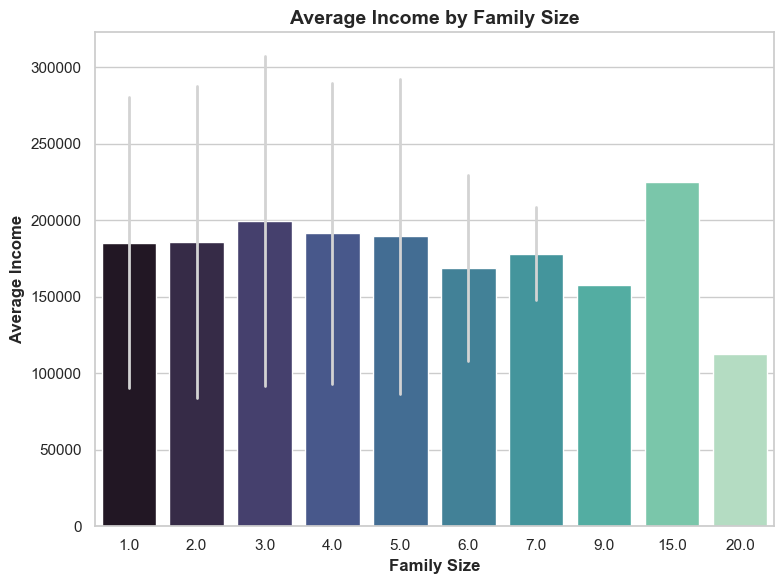

In [64]:
# Average Income by Family Size
plt.figure(figsize=(8, 6))
sns.barplot(
    data=data,
    x='CNT_FAM_MEMBERS',
    y='AMT_INCOME_TOTAL',
    estimator='mean',
    ci='sd',
    palette='mako',
    errcolor='lightgrey',
    errwidth=2
)

plt.title('Average Income by Family Size', fontsize=14, weight='bold')
plt.xlabel('Family Size', fontsize=12, weight='bold')
plt.ylabel('Average Income', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()


#### Financial Analysis – Key Findings
1. Applicant income is right-skewed, with most individuals earning in the low-to-middle income range, while a small number of high-income outliers raise the average above the median.
2. Income varies substantially by occupation, with Managers, Real Estate Agents and IT staff earning the highest on average, while laborers, unemployed, and low-skill workers earn the least.
3. Years of employment show only a weak positive relationship with income, indicating that experience alone does not strongly determine earnings.
4. Applicants with stable income sources (e.g., commercial associates and state servants) tend to earn more than students and pensioners.
5. Higher education levels are associated with higher average income, with academic degree holders earning the most.
6. Housing type reflects socio-economic status, as applicants living in office or co-op apartments earn more than those living with parents or in municipal housing.
7. Asset ownership (property or car) is linked to higher average income, especially for car owners.
8. Income tends to decline as family size increases. Income generally peaks among applicants with small to medium family sizes, while larger families tend to have lower average incomes and higher financial pressure.

<a id="loading"></a>

---

## 4. Analyst Status

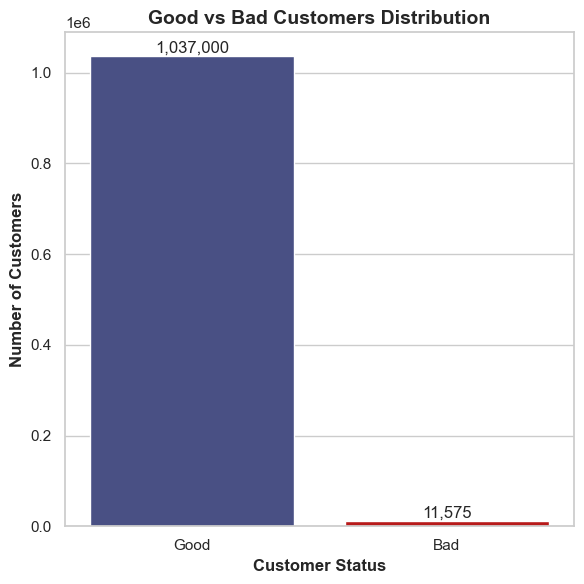

In [13]:
# Good and Bad Customer
plt.figure(figsize=(6, 6))
ax = sns.countplot(
    data=data,
    x='Label',
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'}
)

for p in ax.patches:
    count = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width() / 2,  
        p.get_height(),                 
        f'{count:,}',                   
        ha='center', va='bottom',       
        fontsize=12
    )

# Titles and labels
plt.title('Good vs Bad Customers Distribution', fontsize=14, weight='bold')
plt.xlabel('Customer Status', fontsize=12, weight='bold')
plt.ylabel('Number of Customers', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

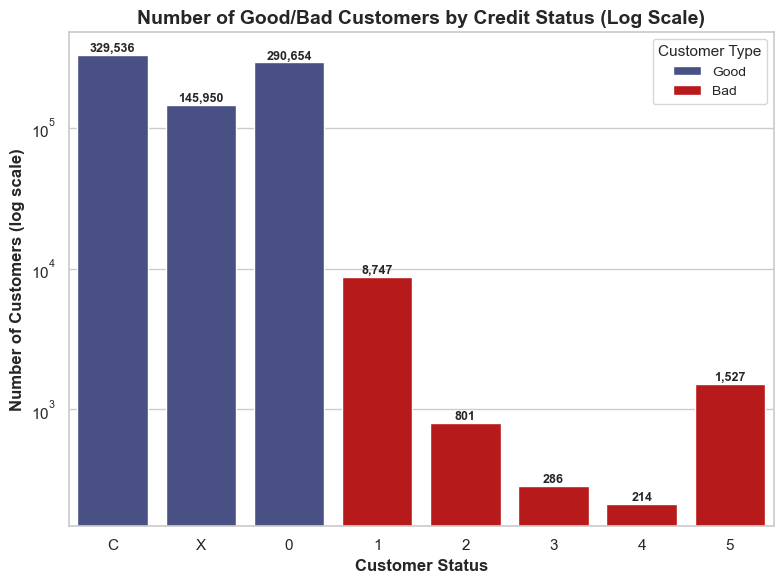

In [29]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=data,
    x='STATUS',
    hue='Label',
    order=['C', 'X', '0', '1', '2', '3', '4', '5'],
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'}
)

# Add count labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'{int(height):,}',
            ha='center', va='bottom',
            fontsize=9, fontweight='bold'
        )

plt.yscale('log') 
plt.title('Number of Good/Bad Customers by Credit Status (Log Scale)', fontsize=14, weight='bold')
plt.xlabel('Credit Status', fontsize=12, weight='bold')
plt.ylabel('Number of Customers (log scale)', fontsize=12, weight='bold')
plt.legend(title='Customer Type', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()

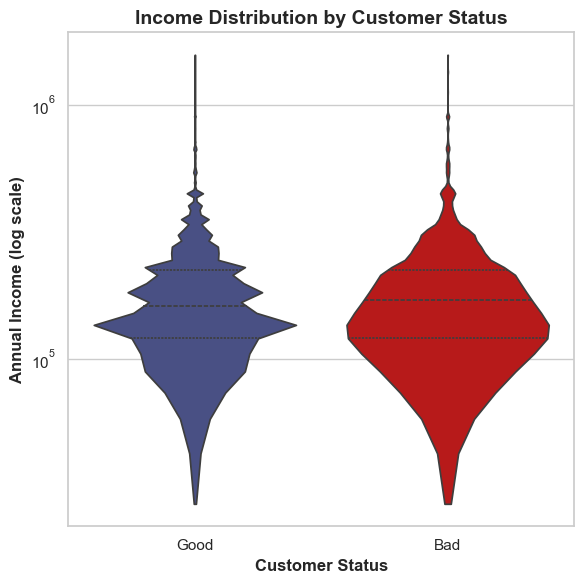

In [45]:
plt.figure(figsize=(6, 6))
sns.violinplot(
    data=data,
    x='Label', y='AMT_INCOME_TOTAL',
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'},
    cut=0, inner='quartile'
)
plt.yscale('log')
plt.title('Income Distribution by Customer Status', fontsize=14, weight='bold')
plt.xlabel('Customer Status', fontsize=12, weight='bold')
plt.ylabel('Annual Income (log scale)', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

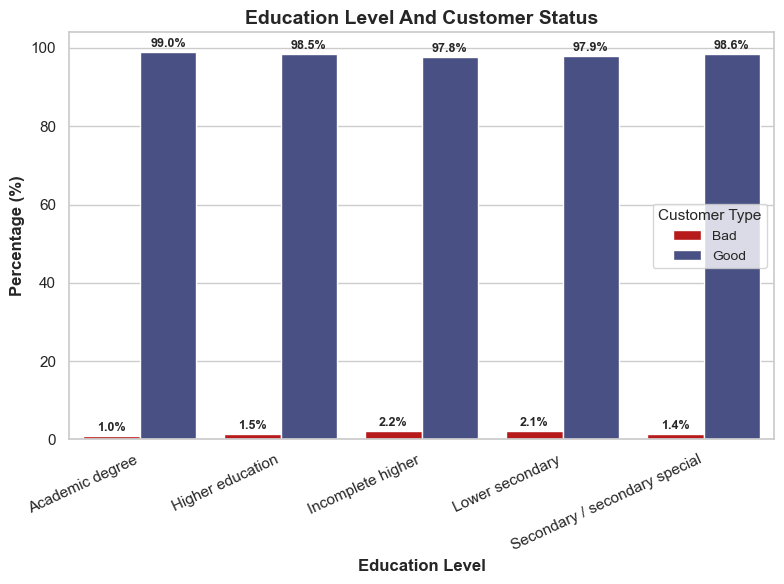

In [58]:
# Education Level And Customer Status
grouped = (
    data.groupby(['NAME_EDUCATION_TYPE', 'Label'])
    .size()
    .reset_index(name='Count')
)
grouped['Percentage'] = grouped.groupby('NAME_EDUCATION_TYPE')['Count'].transform(lambda x: 100 * x / x.sum())


plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=grouped,
    x='NAME_EDUCATION_TYPE', y='Percentage', hue='Label',
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'}
)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{height:.1f}%',
            ha='center', va='bottom',
            fontsize=9, fontweight='bold'
        )

# --- Titles and labels ---
plt.title('Education Level And Customer Status', fontsize=14, weight='bold')
plt.xlabel('Education Level', fontsize=12, weight='bold')
plt.ylabel('Percentage (%)', fontsize=12, weight='bold')
plt.xticks(rotation=25, ha='right')
plt.legend(title='Customer Type', fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


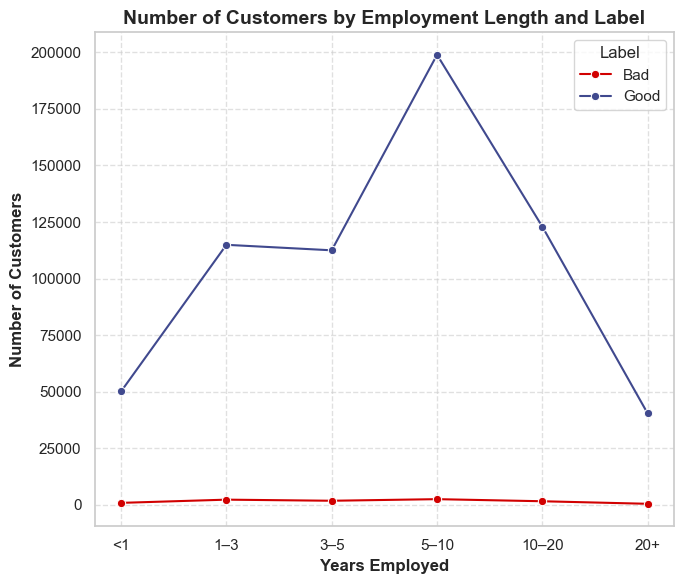

In [27]:
# Count of customers by employment bin and label

data['EMP_YEARS'] = abs(data['DAYS_EMPLOYED']) / 365

bins = [-1, 1, 3, 5, 10, 20, 50]
labels = ['<1', '1–3', '3–5', '5–10', '10–20', '20+']

data['EMP_BIN'] = pd.cut(
    data['EMP_YEARS'],
    bins=bins,
    labels=labels
)
emp_counts = (
    data.groupby(['EMP_BIN', 'Label'])
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(7, 6))
sns.lineplot(
    data=emp_counts, x='EMP_BIN', y='Count',
    hue='Label', marker='o',
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'}
)
plt.title('Number of Customers by Employment Length and Label', fontsize=14, weight='bold')
plt.xlabel('Years Employed', fontsize=12, weight='bold')
plt.ylabel('Number of Customers', fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

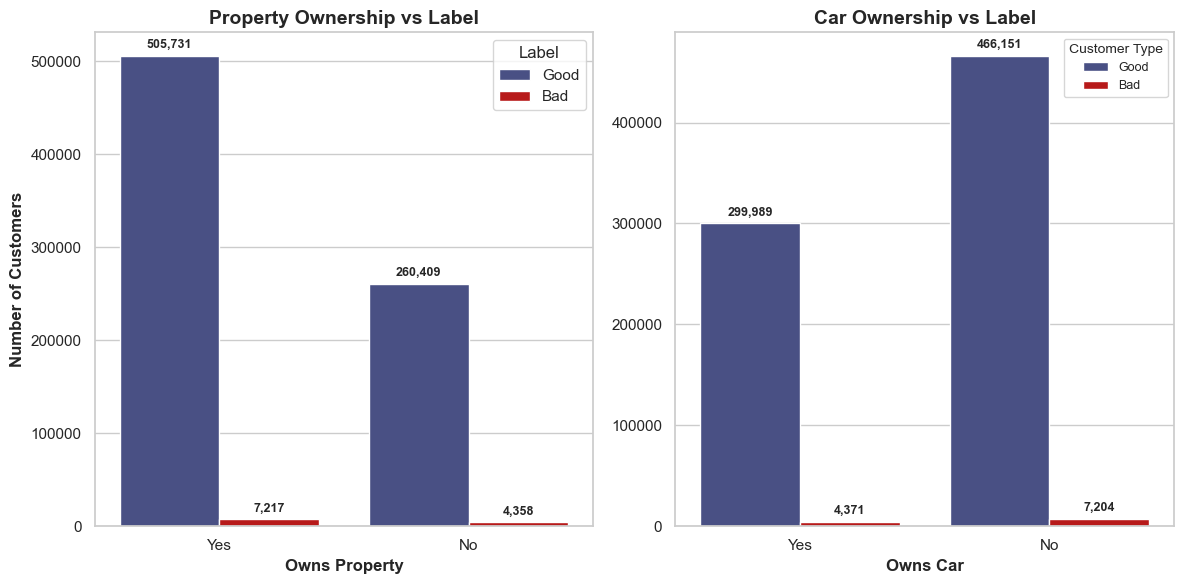

In [21]:
# Ownership and Label
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].replace({0: 'No', 1: 'Yes', 'N': 'No', 'Y': 'Yes'})
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].replace({0: 'No', 1: 'Yes', 'N': 'No', 'Y': 'Yes'})

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Property ownership 
ax1 = sns.countplot(
    data=data,
    x='FLAG_OWN_REALTY', hue='Label',
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'},
    ax=axes[0]
)


for p in ax1.patches:
    height = int(p.get_height())
    if height > 0:  
        ax1.text(
            p.get_x() + p.get_width() / 2, height + 5000,
            f'{height:,}', ha='center', va='bottom',
            fontsize=9, fontweight='bold'
        )

ax1.set_title('Property Ownership vs Label', fontsize=14, weight='bold')
ax1.set_xlabel('Owns Property', fontsize=12, weight='bold')
ax1.set_ylabel('Number of Customers', fontsize=12, weight='bold')

# Car ownership 
ax2 = sns.countplot(
    data=data,
    x='FLAG_OWN_CAR', hue='Label',
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'},
    ax=axes[1]
)

for p in ax2.patches:
    height = int(p.get_height())
    if height > 0:  
        ax2.text(
            p.get_x() + p.get_width() / 2, height + 5000,
            f'{height:,}', ha='center', va='bottom',
            fontsize=9, fontweight='bold'
        )

ax2.set_title('Car Ownership vs Label', fontsize=14, weight='bold')
ax2.set_xlabel('Owns Car', fontsize=12, weight='bold')
ax2.set_ylabel('')

# Legend & layout
plt.legend(title='Customer Type', fontsize=9, title_fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()


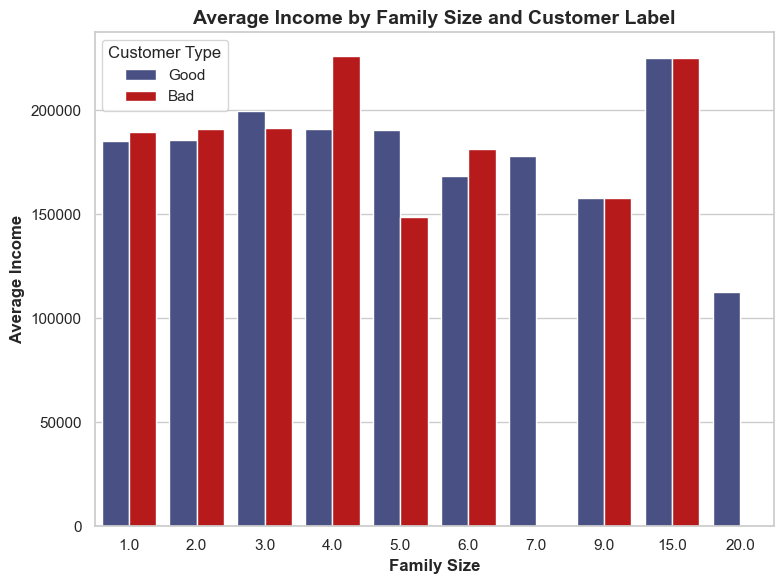

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=data,
    x='CNT_FAM_MEMBERS', y='AMT_INCOME_TOTAL', hue='Label',
    estimator='mean', ci=None,
    palette={'Good': sns.color_palette('mako', 2)[0], 'Bad': '#D10000'}
)
plt.title('Average Income by Family Size and Customer Label', fontsize=14, weight='bold')
plt.xlabel('Family Size', fontsize=12, weight='bold')
plt.ylabel('Average Income', fontsize=12, weight='bold')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()


  STATUS  STATUS_NUM
0      C           1
1      C           1
2      C           1
3      C           1
4      C           1


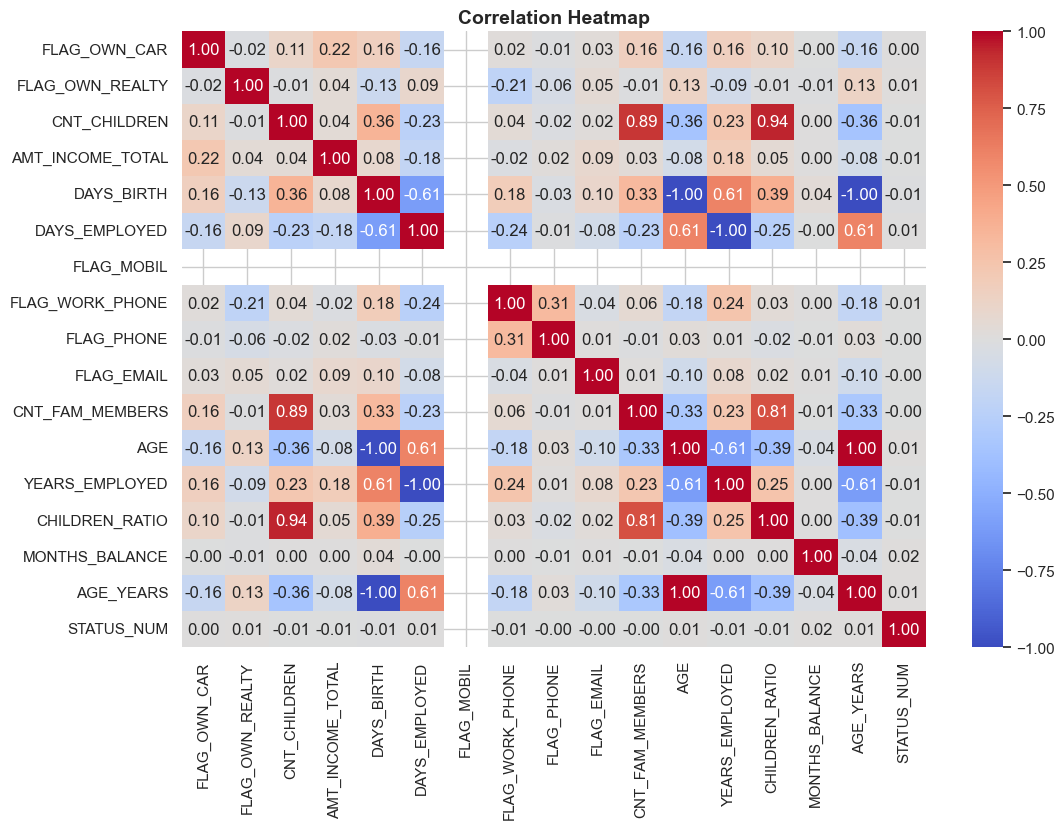

In [14]:
# Create a new numeric column for good/bad
data['STATUS_NUM'] = data['Label'].map({'Good': 1, 'Bad': 0})

# Check conversion
print(data[['STATUS', 'STATUS_NUM']].head())

# Compute correlation for numeric columns only
corr = data.corr(numeric_only=True)


plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14, weight='bold')
plt.show()


#### Analyst Status – Key Summary Points
1. The dataset is extremely imbalanced, with good customers vastly outnumbering bad customers, indicating a strong class imbalance that must be addressed in modeling.
2. Bad customers are concentrated in specific credit status categories, while good customers dominate across all credit statuses.
3. Income distributions of good and bad customers overlap significantly, suggesting that income alone is not sufficient to distinguish credit risk.
4. Education level shows only minor differences in bad customer rates, with bad customers remaining a small proportion across all education groups.
5. Customers with short to moderate employment length (1–10 years) represent the largest share of both good and bad customers, though good customers dominate at every employment length.
6. Property ownership is associated with lower default risk, as property owners have a higher proportion of good customers compared to non-owners.
7. Car ownership shows a weaker relationship with customer status, though non-car owners exhibit slightly higher bad customer counts.
8. Family size shows no clear monotonic relationship with customer status, and income differences between good and bad customers within the same family size are inconsistent.
9. The correlation analysis shows strong internal relationships among demographic variables but no strong linear drivers of customer default, reinforcing the need for feature engineering and multivariate modeling.